<a href="https://colab.research.google.com/github/misbah4064/image_morph/blob/master/image___morph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBSCRIBE to the [channel](https://www.youtube.com/user/19daredevill?sub_confirmation=1) to learn cool things**

![Subscribe](https://media3.giphy.com/media/XGILFirobxDWglaUyj/giphy.gif?cid=ecf05e474afdd7ef5fe2c0fa50f87822d705fbb2613a3b5c&rid=giphy.gif)

In [1]:
!git clone https://github.com/misbah4064/image_morph.git
%cd image_morph

!pip install vcam

Cloning into 'image_morph'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.
/content/image_morph


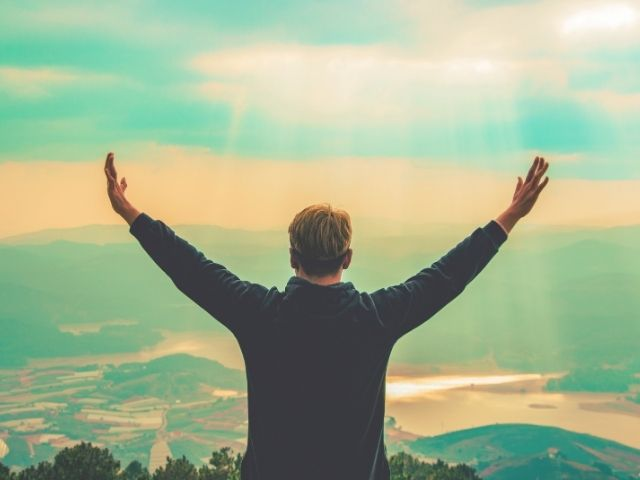

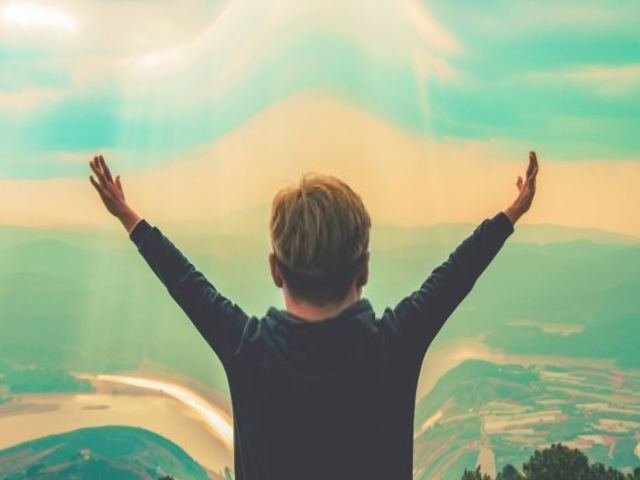

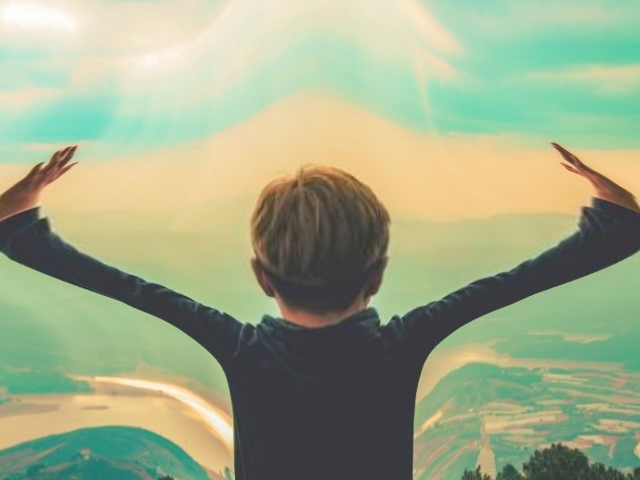

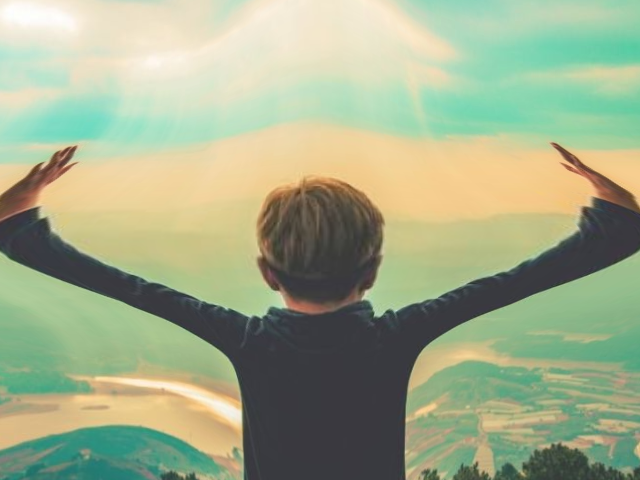

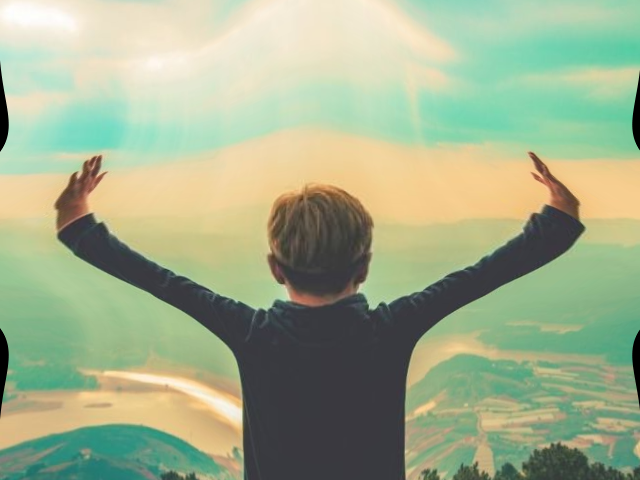

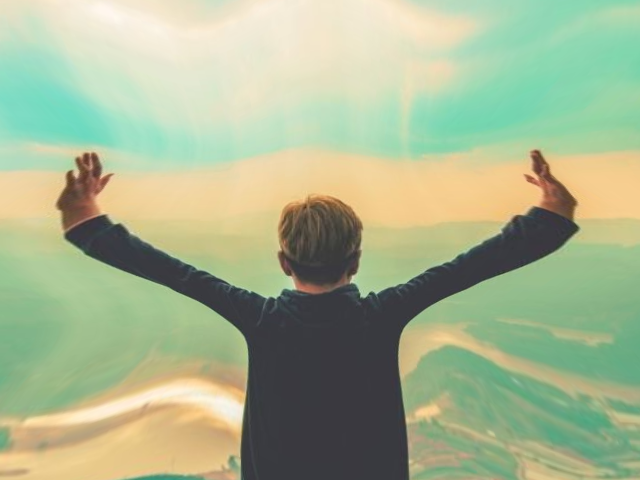

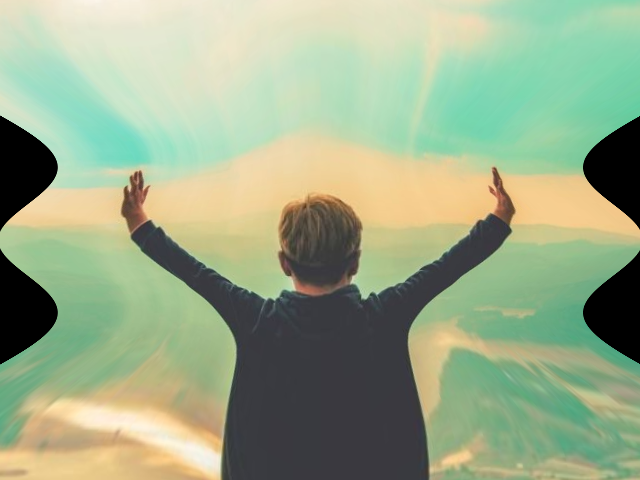

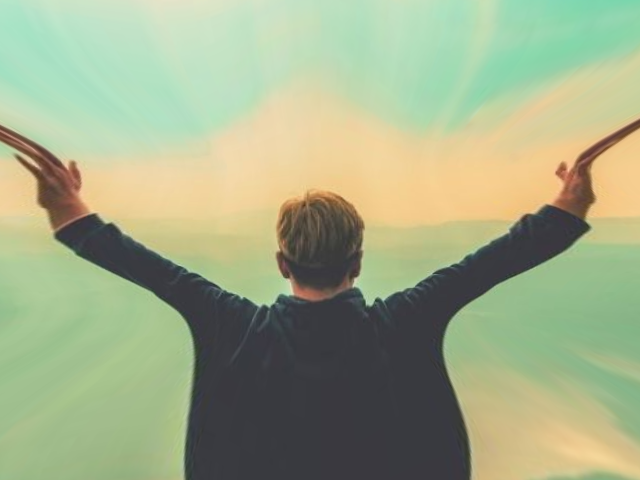

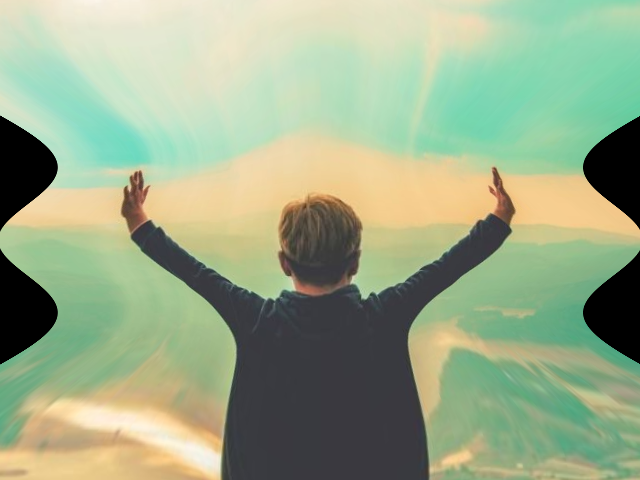

In [2]:
import cv2
import numpy as np
import math
from vcam import vcam,meshGen
from google.colab.patches import cv2_imshow

# Reading the input image. Pass the path of image you would like to use as input image.
img = cv2.imread("image1.jpg")
H,W = img.shape[:2]

# Creating the virtual camera object
c1 = vcam(H=H,W=W)

# Creating the surface object
plane = meshGen(H,W)

cv2_imshow(img)

for mode in range(8):
  if mode == 0:
    plane.Z += 20*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
  elif mode == 1:
    plane.Z += 20*np.exp(-0.5*((plane.Y*1.0/plane.H)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
  elif mode == 2:
    plane.Z -= 10*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
  elif mode == 3:
    plane.Z -= 10*np.exp(-0.5*((plane.Y*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
  elif mode == 4:
    plane.Z += 20*np.sin(2*np.pi*((plane.X-plane.W/4.0)/plane.W)) + 20*np.sin(2*np.pi*((plane.Y-plane.H/4.0)/plane.H))
  elif mode == 5:
    plane.Z -= 20*np.sin(2*np.pi*((plane.X-plane.W/4.0)/plane.W)) - 20*np.sin(2*np.pi*((plane.Y-plane.H/4.0)/plane.H))
  elif mode == 6:
    plane.Z += 100*np.sqrt((plane.X*1.0/plane.W)**2+(plane.Y*1.0/plane.H)**2)
  elif mode == 7:
    plane.Z -= 100*np.sqrt((plane.X*1.0/plane.W)**2+(plane.Y*1.0/plane.H)**2)
  pts3d = plane.getPlane()

  # Projecting / capturing the 3D points using the virtual camera
  pts2d = c1.project(pts3d)
  map_x,map_y = c1.getMaps(pts2d)

  output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

  print(" ")
  # cv2_imshow(np.hstack((img,output)))
  cv2_imshow(output)
